In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [7]:
glb_planck = xr.open_dataarray('/dx02/janoski/cesm/spat_avg_feedbacks/all/b40.1850.cam5-lens.01.glb_planck.nc')
glb_dTS = xr.open_dataarray('/dx02/janoski/cesm/spat_avg_feedbacks/all/b40.1850.cam5-lens.01.glb_dTS.nc')
glb_dSAT = xr.open_dataarray('/dx02/janoski/cesm/spat_avg_feedbacks/all/b40.1850.cam5-lens.01.glb_dSAT.nc')

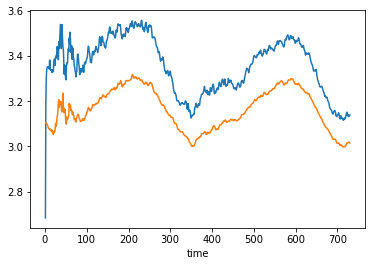

In [100]:
norm_ts = -1 * glb_planck / glb_dTS.where(abs(glb_dTS) >0.2)
norm_ts.mean(dim='ens').plot()
norm_sat = -1 * glb_planck / glb_dSAT.where(abs(glb_dSAT) >0.2)
norm_sat.mean(dim='ens').plot()

# norm_ts = -1 * glb_planck.mean(dim='ens') / glb_dTS.mean(dim='ens')
# norm_ts.plot()
# norm_sat = -1 * glb_planck.mean(dim='ens') / glb_dSAT.mean(dim='ens')
# norm_sat.plot()

In [90]:
old = xr.open_dataarray('/dx02/janoski/cesm/spat_avg_feedbacks/all/b40.1850.cam5-lens.01.arc_planck.nc')
new = xr.open_dataarray('/dx02/janoski/cesm/spat_avg_feedbacks/all/b40.1850.cam5-lens.01.arc_planck_tropo_TOA.nc')
dSAT = xr.open_dataarray('/dx02/janoski/cesm/spat_avg_feedbacks/all/b40.1850.cam5-lens.01.arc_dSAT.nc')
dTS = xr.open_dataarray('/dx02/janoski/cesm/spat_avg_feedbacks/all/b40.1850.cam5-lens.01.arc_dTS.nc')

In [103]:
local_sat = (new/dSAT.where(abs(dSAT)>0.2) + norm_sat)
local_ts = (new/dTS.where(abs(dTS)>0.2) + norm_ts)

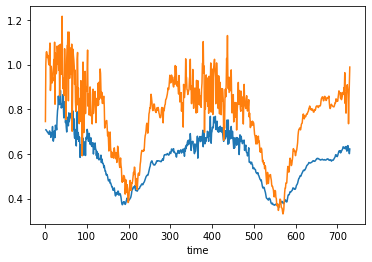

In [104]:
local_sat.mean(dim='ens').plot()
local_ts.mean(dim='ens').plot()

In [105]:
planck_sat_filter = local_sat*dSAT/norm_sat
planck_ts_filter = local_ts*dTS/norm_ts

In [97]:
planck_sat_avg = local_sat*dSAT.mean(dim='ens')/norm_sat
planck_ts_avg = local_sat*dTS.mean(dim='ens')/norm_ts

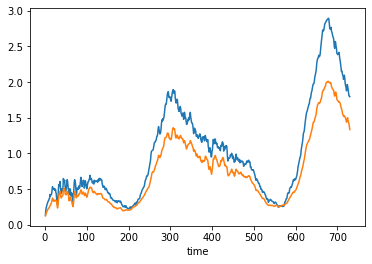

In [107]:
# planck_sat_filter.mean(dim='ens').plot()
planck_ts_filter.mean(dim='ens').plot()
# planck_sat_avg.mean(dim='ens').plot()
planck_ts_avg.mean(dim='ens').plot()